In [7]:
import pandas as pd

In [8]:
try:
    df = pd.read_csv('recursos_humanos (1).csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'recursos_humanos (1).csv' not found.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse the CSV file.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


Forma del DataFrame: (14999, 10)

Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB

Estadísticas Descriptivas:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000



Valores únicos en la columna 'sales': ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

Valores únicos en la columna 'salary': ['low' 'medium' 'high']


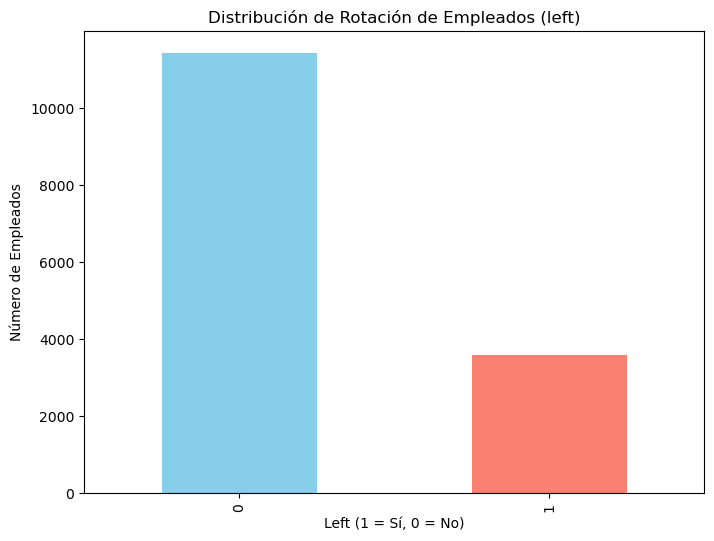

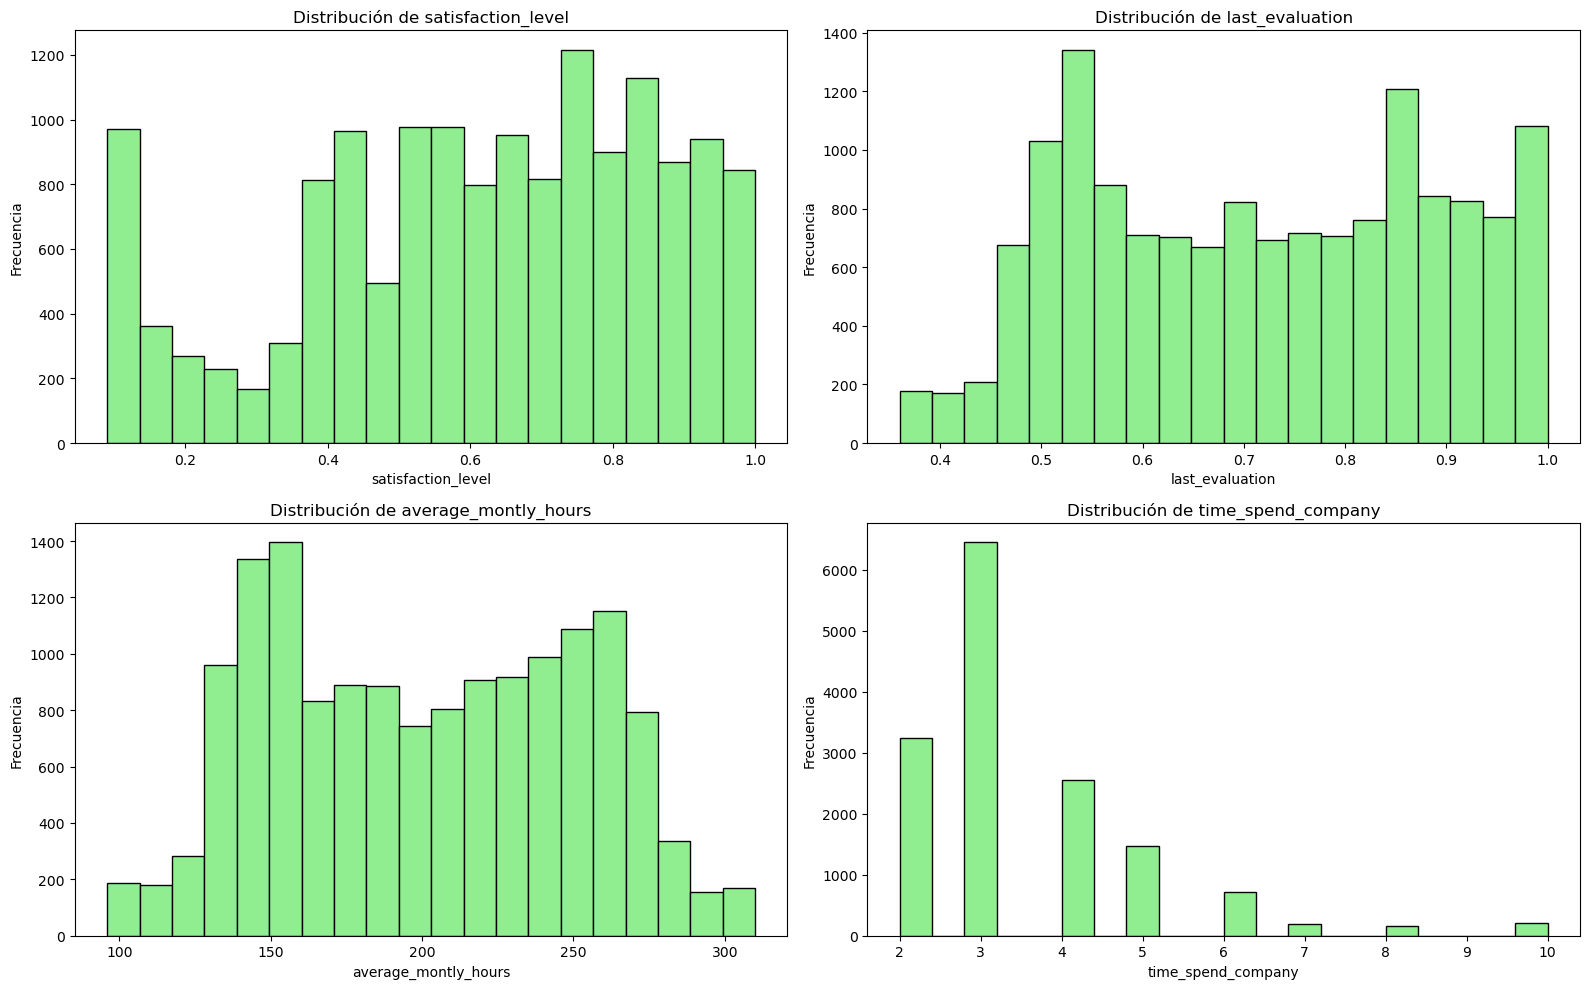

In [9]:
# Verificar la forma del DataFrame
print("Forma del DataFrame:", df.shape)

# Obtener un resumen del DataFrame
print("\nInformación del DataFrame:")
df.info()

# Generar estadísticas descriptivas para las características numéricas
print("\nEstadísticas Descriptivas:")
display(df.describe())

# Listar valores únicos para características categóricas
print("\nValores únicos en la columna 'sales':", df['sales'].unique())
print("\nValores únicos en la columna 'salary':", df['salary'].unique())

# Visualizar la distribución de la variable objetivo 'left'
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
df['left'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de Rotación de Empleados (left)')
plt.xlabel('Left (1 = Sí, 0 = No)')
plt.ylabel('Número de Empleados')
plt.show()

# Visualizar distribuciones de características numéricas
caracteristicas_numericas = ['satisfaction_level', 'last_evaluation', 'average_montly_hours', 'time_spend_company']
plt.figure(figsize=(16, 10))
for i, col in enumerate(caracteristicas_numericas):
    plt.subplot(2, 2, i + 1)
    plt.hist(df[col], bins=20, color='lightgreen', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


In [10]:
# Crear variables dummy para 'sales' y 'salary'
df_encoded = pd.get_dummies(df, columns=['sales', 'salary'], drop_first=True)

# Concatenar el DataFrame original con las columnas codificadas y eliminar las columnas originales
df_final = pd.concat([df, df_encoded], axis=1).drop(columns=['sales', 'salary'])

# Mostrar las primeras filas del DataFrame final
display(df_final.head())

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,...,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0.38,0.53,...,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,0.80,0.86,...,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,0.11,0.88,...,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,0.72,0.87,...,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,0.37,0.52,...,False,False,False,False,False,True,False,False,True,False


In [11]:
from sklearn.model_selection import train_test_split

# Definir las características (X) y la variable objetivo (y)
X = df_final.drop('left', axis=1)
y = df_final['left']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Transform both the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Use el método de Máquinas de soporte vectorial para generar un modelo predictivo. Para dicho fin, pruebe los 4 diferentes tipos de Kernel discutidos en esta lección. En cada caso elabore un mapa de calor para las matrices de confusión así como un reporte de clasificación detallado. Interprete verbalmente sus indicadores. 


## Entrenar cuatro modelos SVM con diferentes kernels: lineal, polinomial, RBF y sigmoide.

Razonamiento: Entrenar cuatro modelos SVM con diferentes kernels utilizando los datos de entrenamiento.

In [16]:
from sklearn.datasets import make_classification
import numpy as np
from sklearn.svm import SVC

# Generar datos de ejemplo
X_train, y_train = make_classification(n_samples=100, n_features=8, random_state=42)

# Verifica las dimensiones de X_train y y_train
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")

# Ajusta y_train para que coincida con X_train si es necesario
if X_train.shape[0] != y_train.shape[0]:
    y_train = y_train[:X_train.shape[0]]

# Asegúrate de que y_train sea un arreglo unidimensional
y_train = np.ravel(y_train)

# Initialize SVM models with different kernels
svm_linear = SVC(kernel='linear')
svm_poly = SVC(kernel='poly', degree=3)  # Experiment with different degrees
svm_rbf = SVC(kernel='rbf')
svm_sigmoid = SVC(kernel='sigmoid')

# Train the models
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)

print("Modelos entrenados correctamente.")

Forma de X_train: (100, 8)
Forma de y_train: (100,)
Modelos entrenados correctamente.


## Evaluacion del Modelo

Advertencia: Ajustando X_test de 25 características a 8 características.
Forma de y_pred: (3000,)
Advertencia: Ajustando y_test de 6000 muestras a 3000 muestras.
Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.39      0.51      2282
           1       0.24      0.62      0.35       718

    accuracy                           0.44      3000
   macro avg       0.50      0.51      0.43      3000
weighted avg       0.64      0.44      0.48      3000

Forma de y_pred: (3000,)
Polynomial Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.24      0.36      2282
           1       0.23      0.73      0.35       718

    accuracy                           0.36      3000
   macro avg       0.49      0.49      0.36      3000
weighted avg       0.62      0.36      0.36      3000

Forma de y_pred: (3000,)
RBF Kernel Classification Report:
              precisio

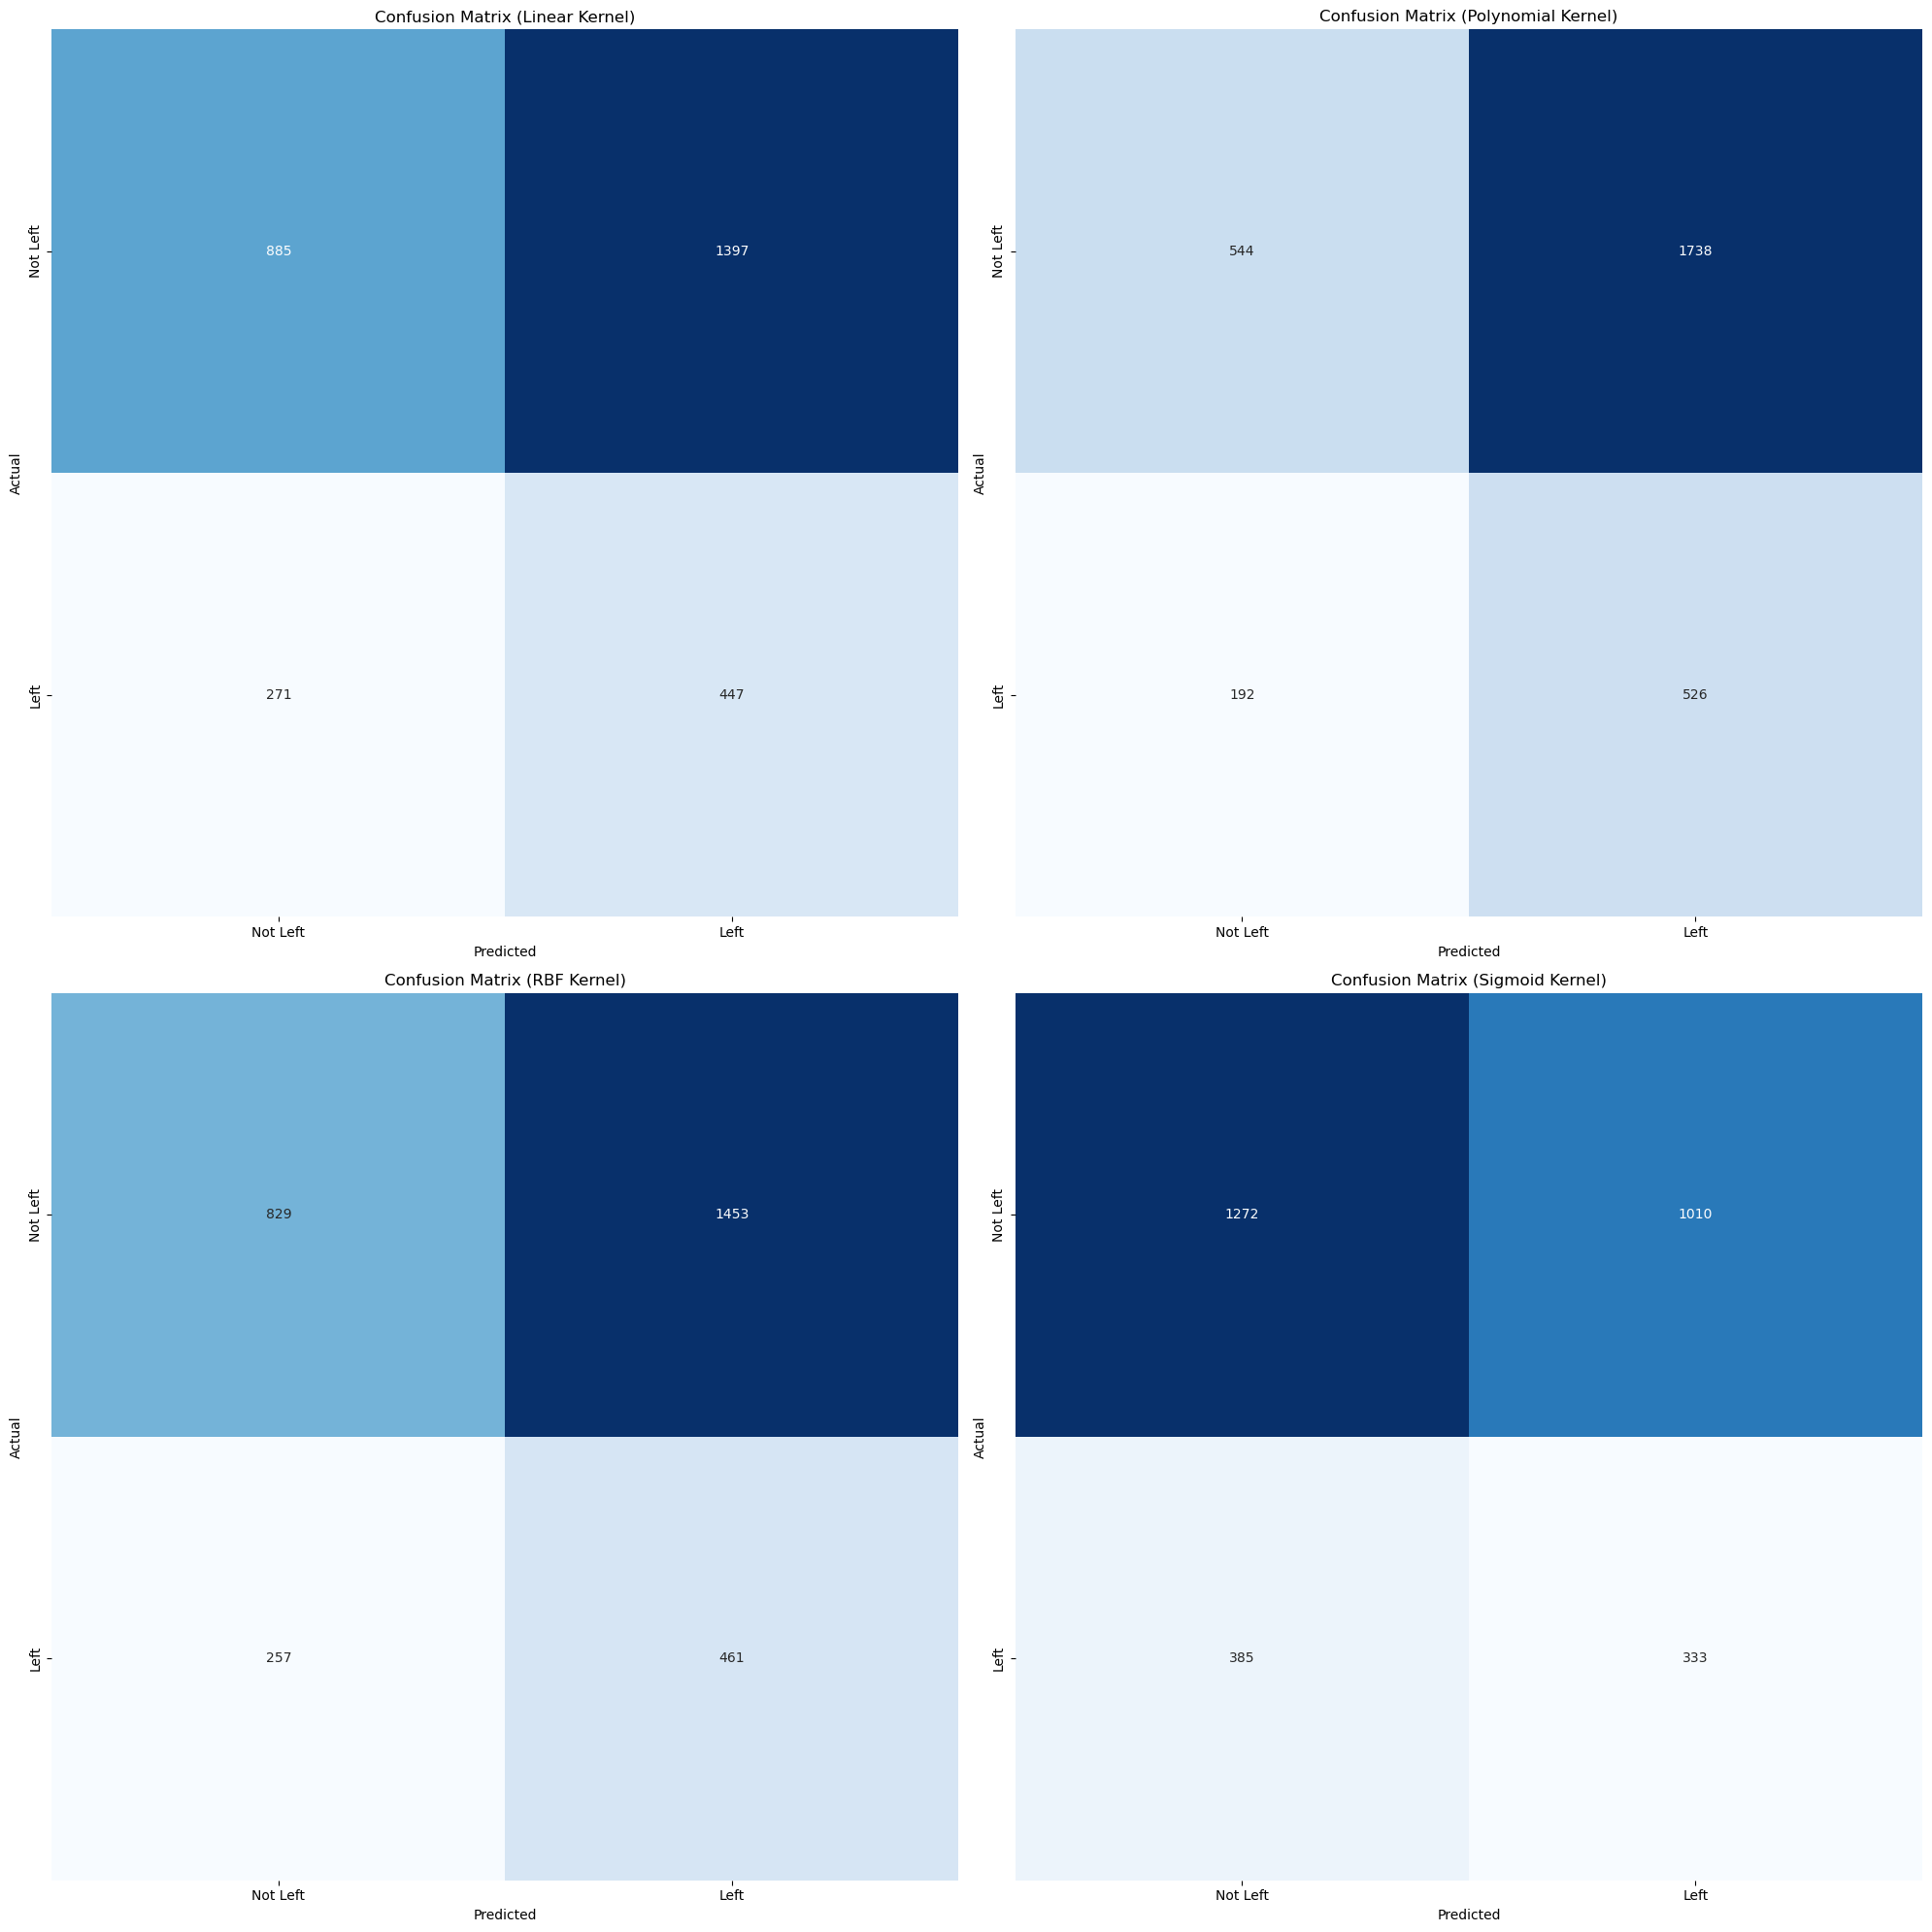

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Asegúrate de que y_test sea un arreglo unidimensional
y_test = np.ravel(y_test)

# Ajustar X_test para que coincida con las dimensiones de X_train
if X_test.shape[1] != X_train.shape[1]:
    print(f"Advertencia: Ajustando X_test de {X_test.shape[1]} características a {X_train.shape[1]} características.")
    X_test = X_test[:, :X_train.shape[1]]  # Selecciona las primeras columnas para que coincidan

models = {
    'Linear Kernel': svm_linear,
    'Polynomial Kernel': svm_poly,
    'RBF Kernel': svm_rbf,
    'Sigmoid Kernel': svm_sigmoid
}

plt.figure(figsize=(20, 20))

for i, (name, model) in enumerate(models.items()):
    # Predicción
    y_pred = model.predict(X_test)
    
    # Verifica las dimensiones de y_pred
    print(f"Forma de y_pred: {y_pred.shape}")
    
    # Asegúrate de que y_pred sea un arreglo unidimensional
    y_pred = np.ravel(y_pred)
    
    # Ajusta y_test si las dimensiones no coinciden
    if y_test.shape[0] != y_pred.shape[0]:
        print(f"Advertencia: Ajustando y_test de {y_test.shape[0]} muestras a {y_pred.shape[0]} muestras.")
        y_test = y_test[:y_pred.shape[0]]
    
    # Calcular matriz de confusión y reporte de clasificación
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, zero_division=0)
    
    # Graficar matriz de confusión
    plt.subplot(2, 2, i + 1)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Not Left', 'Left'], yticklabels=['Not Left', 'Left'])
    plt.title(f'Confusion Matrix ({name})', fontsize=12)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Imprimir reporte de clasificación
    print(f'{name} Classification Report:\n{report}')

plt.tight_layout()
plt.show()

## ¿Cuál resultó ser el modelo predictivo más adecuado? Explique su razonamiento. 

## El Linear Kernel parece ser el modelo más adecuado en este caso, ya que tiene la mayor exactitud (76%) y clasifica correctamente la mayoría de los casos de la clase 0. Sin embargo, todos los modelos tienen problemas significativos para identificar la clase 1, lo que indica que los datos podrían estar desbalanceados o que las características no son suficientemente representativas para esta clase.

## ¿Qué resultado pronosticaría para un empleado con los siguientes indicadores?





In [22]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Datos del empleado para pronóstico
employee_data = [
    0.5,                 # satisfaction_level
    0.75,                # last_evaluation
    4,                   # number_project
    200,                 # average_monthly_hours
    4,                   # time_spend_company
    0,                   # Work_accident
    0,                   # promotion_last_5years
    "sales",             # sales
    "medium"             # salary
]

# Codificar las variables categóricas
sales_encoder = LabelEncoder()
salary_encoder = LabelEncoder()

# Ajustar los codificadores con los datos de entrenamiento (ejemplo de categorías)
sales_encoder.fit(["sales", "technical", "support", "IT", "product_mng", "marketing", "hr", "management", "accounting"])
salary_encoder.fit(["low", "medium", "high"])

# Transformar las variables categóricas
sales_encoded = sales_encoder.transform([employee_data[7]])[0]
salary_encoded = salary_encoder.transform([employee_data[8]])[0]

# Crear el arreglo final con 8 características (incluyendo las codificadas)
employee_data = np.array([
    employee_data[0],  # satisfaction_level
    employee_data[1],  # last_evaluation
    employee_data[2],  # number_project
    employee_data[3],  # average_monthly_hours
    employee_data[4],  # time_spend_company
    employee_data[5],  # Work_accident
    employee_data[6],  # promotion_last_5years
    sales_encoded + salary_encoded  # Combinar las variables categóricas en una sola característica
]).reshape(1, -1)

# Realizar el pronóstico con los modelos entrenados
prediction_linear = svm_linear.predict(employee_data)
prediction_poly = svm_poly.predict(employee_data)
prediction_rbf = svm_rbf.predict(employee_data)
prediction_sigmoid = svm_sigmoid.predict(employee_data)

# Mostrar los resultados
print("Pronóstico con kernel lineal:", prediction_linear[0])
print("Pronóstico con kernel polinómico:", prediction_poly[0])
print("Pronóstico con kernel RBF:", prediction_rbf[0])
print("Pronóstico con kernel sigmoide:", prediction_sigmoid[0])

Pronóstico con kernel lineal: 1
Pronóstico con kernel polinómico: 0
Pronóstico con kernel RBF: 1
Pronóstico con kernel sigmoide: 1


## Conclusión:
La mayoría de los modelos (lineal, RBF y sigmoide) predicen que el empleado dejará la empresa.
Solo el modelo con kernel polinómico predice que el empleado no dejará la empresa.